In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 18s 82us/step - loss: 0.0014 - val_loss: 3.0513e-04
Epoch 2/150
213605/213605 [==============================] - 17s 80us/step - loss: 2.2102e-04 - val_loss: 1.6467e-04
Epoch 3/150
213605/213605 [==============================] - 17s 80us/step - loss: 1.4363e-04 - val_loss: 1.3295e-04
Epoch 4/150
213605/213605 [==============================] - 17s 80us/step - loss: 1.2896e-04 - val_loss: 1.2814e-04
Epoch 5/150
213605/213605 [==============================] - 17s 80us/step - loss: 1.2189e-04 - val_loss: 1.2095e-04
Epoch 6/150
213605/213605 [==============================] - 17s 80us/step - loss: 1.1132e-04 - val_loss: 1.0856e-04
Epoch 7/150
213605/213605 [===================

213605/213605 [==============================] - 16s 73us/step - loss: 3.7679e-05 - val_loss: 4.1098e-05
Epoch 69/150
213605/213605 [==============================] - 16s 73us/step - loss: 3.7808e-05 - val_loss: 4.2211e-05
Epoch 70/150
213605/213605 [==============================] - 16s 73us/step - loss: 3.7727e-05 - val_loss: 5.9669e-05
Epoch 71/150
213605/213605 [==============================] - 16s 74us/step - loss: 3.7343e-05 - val_loss: 4.0134e-05
Epoch 72/150
213605/213605 [==============================] - 16s 74us/step - loss: 3.7233e-05 - val_loss: 3.7545e-05
Epoch 73/150
213605/213605 [==============================] - 16s 74us/step - loss: 3.7430e-05 - val_loss: 4.8001e-05
Epoch 74/150
213605/213605 [==============================] - 16s 74us/step - loss: 3.6877e-05 - val_loss: 4.1012e-05
Epoch 75/150
213605/213605 [==============================] - 16s 73us/step - loss: 3.6740e-05 - val_loss: 3.8144e-05
Epoch 76/150
213605/213605 [==============================] - 16s 73u

213605/213605 [==============================] - 17s 78us/step - loss: 3.1394e-05 - val_loss: 3.6092e-05
Epoch 138/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.1800e-05 - val_loss: 4.5090e-05
Epoch 139/150
213605/213605 [==============================] - 19s 88us/step - loss: 3.1130e-05 - val_loss: 3.3868e-05
Epoch 140/150
213605/213605 [==============================] - 17s 77us/step - loss: 3.1009e-05 - val_loss: 3.7463e-05
Epoch 141/150
213605/213605 [==============================] - 19s 89us/step - loss: 3.1195e-05 - val_loss: 3.3159e-05
Epoch 142/150
213605/213605 [==============================] - 19s 87us/step - loss: 3.1082e-05 - val_loss: 2.7450e-05
Epoch 143/150
213605/213605 [==============================] - 18s 83us/step - loss: 3.0989e-05 - val_loss: 3.1371e-05
Epoch 144/150
213605/213605 [==============================] - 18s 83us/step - loss: 3.0717e-05 - val_loss: 3.2970e-05
Epoch 145/150
213605/213605 [==============================] -

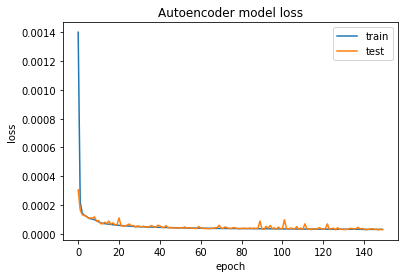

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 50s 232us/step - loss: 0.0386 - accuracy: 0.9902 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 2/50
213605/213605 [==============================] - 45s 209us/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 3/50
213605/213605 [==============================] - 46s 217us/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 4/50
213605/213605 [==============================] - 46s 214us/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 5/50
213605/213605 [==============================] - 40s 189us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 6/50
213605/213605 [==============================] - 40s 187us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 7/50
213605/213605 [=================

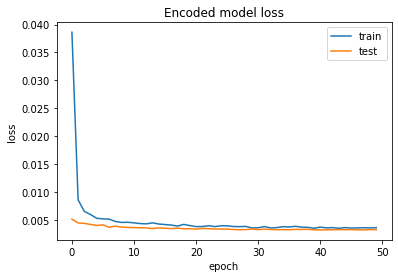

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994241734782731


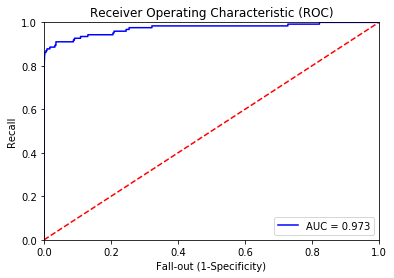

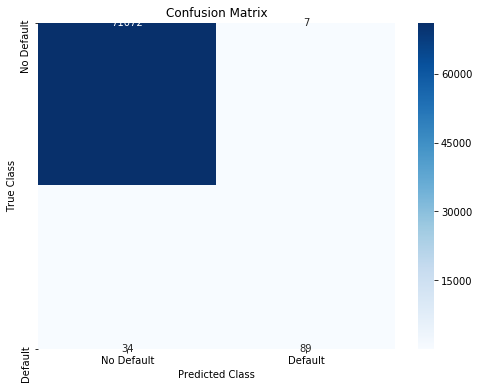

AUC(ROC): 0.8617393769007964
Precision: 0.9270833333333334
Recall: 0.7235772357723578
F1 score: 0.8127853881278538
False positives: 7
True positives: 89
False negatives: 34
True negatives: 71072
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 17s 78us/step - loss: 0.0018 - val_loss: 3.3202e-04
Epoch 2/150
213605/213605 [==============================] - 16s 76us/step - loss: 2.3927e-04 - val_loss: 1.7793e-04
Epoch 3/150
213605/213605 [==============================] - 16s 77us/step - loss: 1.4843e-04 - val_loss: 1.6144e-04
Epoch 4/150
213605/213605 [==============================] - 16s 76us/step - loss: 1.2592e-04 - val_loss: 1.3825e-04
Epoch 5/150
213605/213605 [==============================] - 16s 76us/step - loss: 1.2025e-04 - val_loss: 1.1880e-04
Epoch 6/150
213605/213605 [==============================] - 17s 77us/step - loss: 1.1445e-04 - val_loss: 1.1900e-04
Epoch 7/150
213605/213605 [===================

213605/213605 [==============================] - 17s 79us/step - loss: 4.3001e-05 - val_loss: 4.4164e-05
Epoch 69/150
213605/213605 [==============================] - 17s 79us/step - loss: 4.2959e-05 - val_loss: 4.1887e-05
Epoch 70/150
213605/213605 [==============================] - 17s 79us/step - loss: 4.2825e-05 - val_loss: 4.2098e-05
Epoch 71/150
213605/213605 [==============================] - 17s 80us/step - loss: 4.2352e-05 - val_loss: 4.6510e-05
Epoch 72/150
213605/213605 [==============================] - 17s 79us/step - loss: 4.2722e-05 - val_loss: 4.7742e-05
Epoch 73/150
213605/213605 [==============================] - 17s 79us/step - loss: 4.2138e-05 - val_loss: 4.7116e-05
Epoch 74/150
213605/213605 [==============================] - 17s 80us/step - loss: 4.2352e-05 - val_loss: 4.7750e-05
Epoch 75/150
213605/213605 [==============================] - 17s 80us/step - loss: 4.1669e-05 - val_loss: 4.6066e-05
Epoch 76/150
213605/213605 [==============================] - 17s 80u

213605/213605 [==============================] - 17s 79us/step - loss: 3.4623e-05 - val_loss: 3.3202e-05
Epoch 138/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.4391e-05 - val_loss: 3.9380e-05
Epoch 139/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.4824e-05 - val_loss: 3.5980e-05
Epoch 140/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.4250e-05 - val_loss: 3.6326e-05
Epoch 141/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.3957e-05 - val_loss: 6.9351e-05
Epoch 142/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.4324e-05 - val_loss: 3.1262e-05
Epoch 143/150
213605/213605 [==============================] - 17s 80us/step - loss: 3.3898e-05 - val_loss: 3.7976e-05
Epoch 144/150
213605/213605 [==============================] - 17s 80us/step - loss: 3.3476e-05 - val_loss: 3.8542e-05
Epoch 145/150
213605/213605 [==============================] -

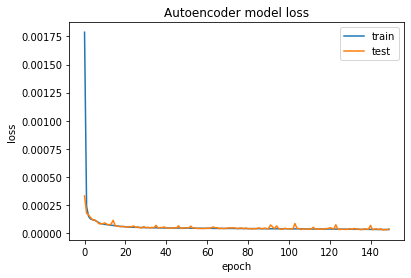

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 39s 185us/step - loss: 0.0238 - accuracy: 0.9947 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 2/50
213605/213605 [==============================] - 39s 180us/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 3/50
213605/213605 [==============================] - 39s 180us/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 4/50
213605/213605 [==============================] - 39s 181us/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 5/50
213605/213605 [==============================] - 39s 180us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 6/50
213605/213605 [==============================] - 39s 180us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 7/50
213605/213605 [=================

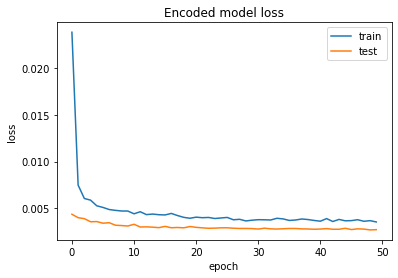

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994943962248252


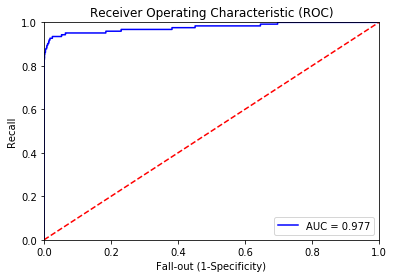

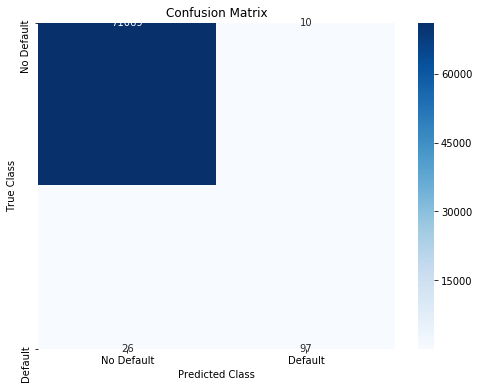

AUC(ROC): 0.8942385988245988
Precision: 0.9065420560747663
Recall: 0.7886178861788617
F1 score: 0.8434782608695651
False positives: 10
True positives: 97
False negatives: 26
True negatives: 71069
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 17s 79us/step - loss: 0.0015 - val_loss: 3.3337e-04
Epoch 2/150
213605/213605 [==============================] - 16s 77us/step - loss: 2.5876e-04 - val_loss: 1.9365e-04
Epoch 3/150
213605/213605 [==============================] - 16s 77us/step - loss: 1.5717e-04 - val_loss: 1.5354e-04
Epoch 4/150
213605/213605 [==============================] - 16s 77us/step - loss: 1.3209e-04 - val_loss: 1.1748e-04
Epoch 5/150
213605/213605 [==============================] - 16s 76us/step - loss: 1.1138e-04 - val_loss: 1.0840e-04
Epoch 6/150
213605/213605 [==============================] - 16s 76us/step - loss: 1.0441e-04 - val_loss: 1.0410e-04
Epoch 7/150
213605/213605 [===================

213605/213605 [==============================] - 16s 76us/step - loss: 3.5817e-05 - val_loss: 3.8322e-05
Epoch 69/150
213605/213605 [==============================] - 16s 76us/step - loss: 3.5995e-05 - val_loss: 3.9083e-05
Epoch 70/150
213605/213605 [==============================] - 16s 77us/step - loss: 3.5606e-05 - val_loss: 4.1871e-05
Epoch 71/150
213605/213605 [==============================] - 16s 77us/step - loss: 3.5311e-05 - val_loss: 3.4920e-05
Epoch 72/150
213605/213605 [==============================] - 16s 76us/step - loss: 3.5494e-05 - val_loss: 4.0973e-05
Epoch 73/150
213605/213605 [==============================] - 16s 76us/step - loss: 3.5209e-05 - val_loss: 3.7889e-05
Epoch 74/150
213605/213605 [==============================] - 17s 78us/step - loss: 3.5014e-05 - val_loss: 4.6251e-05
Epoch 75/150
213605/213605 [==============================] - 16s 77us/step - loss: 3.4901e-05 - val_loss: 4.5870e-05
Epoch 76/150
213605/213605 [==============================] - 16s 76u

213605/213605 [==============================] - 17s 79us/step - loss: 3.1711e-05 - val_loss: 3.6187e-05
Epoch 138/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.0323e-05 - val_loss: 3.5262e-05
Epoch 139/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.0383e-05 - val_loss: 2.8527e-05
Epoch 140/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.0376e-05 - val_loss: 3.4988e-05
Epoch 141/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.0456e-05 - val_loss: 3.1923e-05
Epoch 142/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.0332e-05 - val_loss: 3.8368e-05
Epoch 143/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.0434e-05 - val_loss: 3.9162e-05
Epoch 144/150
213605/213605 [==============================] - 17s 79us/step - loss: 3.0386e-05 - val_loss: 3.2804e-05
Epoch 145/150
213605/213605 [==============================] -

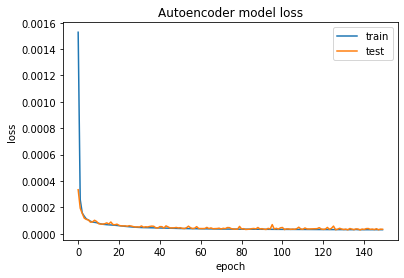

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 41s 190us/step - loss: 0.0251 - accuracy: 0.9937 - val_loss: 0.0061 - val_accuracy: 0.9992
Epoch 2/50
213605/213605 [==============================] - 40s 185us/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 3/50
213605/213605 [==============================] - 40s 185us/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 4/50
213605/213605 [==============================] - 40s 186us/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 5/50
213605/213605 [==============================] - 40s 187us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 6/50
213605/213605 [==============================] - 40s 186us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 7/50
213605/213605 [=================

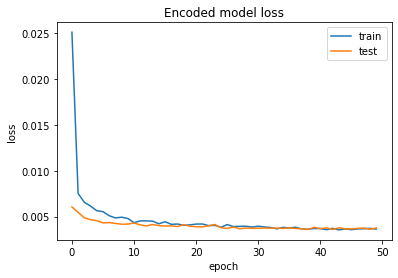

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993539507317211


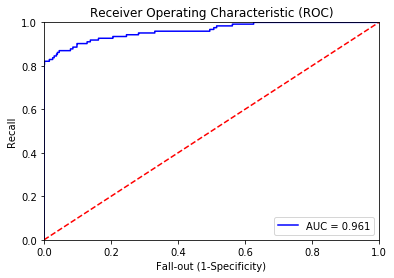

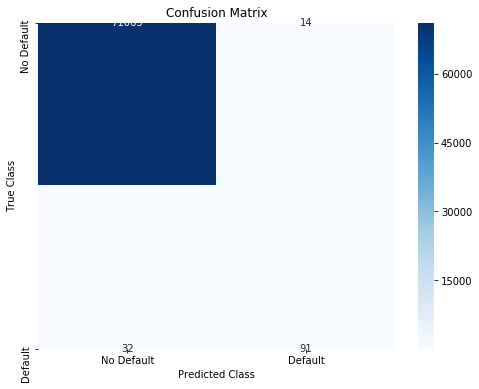

AUC(ROC): 0.8698202172162269
Precision: 0.8666666666666667
Recall: 0.7398373983739838
F1 score: 0.7982456140350878
False positives: 14
True positives: 91
False negatives: 32
True negatives: 71065
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426474, 30)
After OverSampling, the shape of train_y: (426474,) 

After OverSampling, counts of label '1': 213237
After OverSampling, counts of label '0': 213237
Train on 213606 samples, validate on 71201 samples
Epoch 1/150
213606/213606 [==============================] - 17s 82us/step - loss: 0.0017 - val_loss: 3.0220e-04
Epoch 2/150
213606/213606 [==============================] - 17s 79us/step - loss: 2.2324e-04 - val_loss: 1.9105e-04
Epoch 3/150
213606/213606 [==============================] - 17s 80us/step - loss: 1.4139e-04 - val_loss: 1.3410e-04
Epoch 4/150
213606/213606 [==============================] - 17s 79us/step - loss: 1.1910e-04 - val_loss: 1.1133e-04
Epoch 5/150
213606/213606 [==============================] - 17s 79us/step - loss: 1.0974e-04 - val_loss: 1.1550e-04
Epoch 6/150
213606/213606 [==============================] - 17s 79us/step - loss: 1.0529e-04 - val_loss: 1.0557e-04
Epoch 7/150
213606/213606 [===================

213606/213606 [==============================] - 17s 81us/step - loss: 3.8127e-05 - val_loss: 3.8162e-05
Epoch 69/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.7570e-05 - val_loss: 1.1909e-04
Epoch 70/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.7830e-05 - val_loss: 3.7300e-05
Epoch 71/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.7293e-05 - val_loss: 4.6385e-05
Epoch 72/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.7272e-05 - val_loss: 3.7531e-05
Epoch 73/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.6913e-05 - val_loss: 4.5792e-05
Epoch 74/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.6726e-05 - val_loss: 4.3113e-05
Epoch 75/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.6548e-05 - val_loss: 4.2165e-05
Epoch 76/150
213606/213606 [==============================] - 17s 81u

213606/213606 [==============================] - 17s 81us/step - loss: 3.0265e-05 - val_loss: 2.6607e-05
Epoch 138/150
213606/213606 [==============================] - 17s 81us/step - loss: 2.9986e-05 - val_loss: 3.0494e-05
Epoch 139/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.0080e-05 - val_loss: 4.1468e-05
Epoch 140/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.0405e-05 - val_loss: 3.2683e-05
Epoch 141/150
213606/213606 [==============================] - 17s 81us/step - loss: 2.9980e-05 - val_loss: 3.5717e-05
Epoch 142/150
213606/213606 [==============================] - 17s 81us/step - loss: 3.0010e-05 - val_loss: 2.9741e-05
Epoch 143/150
213606/213606 [==============================] - 17s 81us/step - loss: 2.9935e-05 - val_loss: 3.1451e-05
Epoch 144/150
213606/213606 [==============================] - 17s 81us/step - loss: 2.9702e-05 - val_loss: 2.8568e-05
Epoch 145/150
213606/213606 [==============================] -

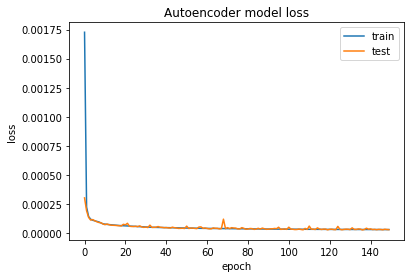

Train on 213606 samples, validate on 71201 samples
Epoch 1/50
213606/213606 [==============================] - 42s 195us/step - loss: 0.0399 - accuracy: 0.9892 - val_loss: 0.0056 - val_accuracy: 0.9991
Epoch 2/50
213606/213606 [==============================] - 41s 191us/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 3/50
213606/213606 [==============================] - 41s 191us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 4/50
213606/213606 [==============================] - 41s 191us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 5/50
213606/213606 [==============================] - 41s 191us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 6/50
213606/213606 [==============================] - 41s 191us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 7/50
213606/213606 [=================

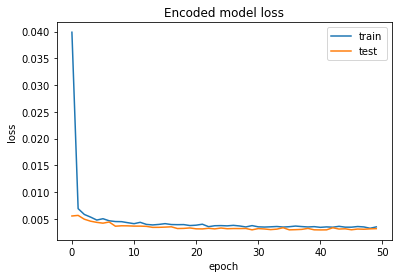

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993539416581227


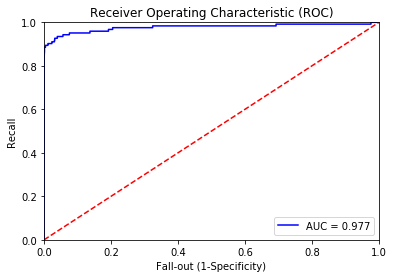

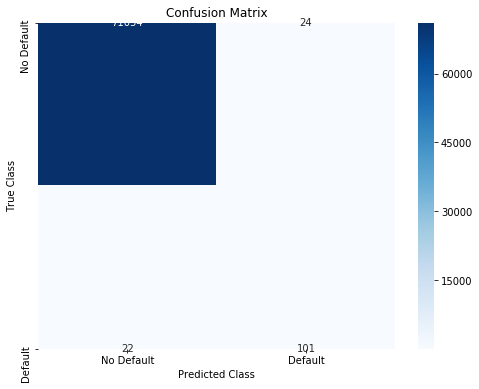

AUC(ROC): 0.9104002770802351
Precision: 0.808
Recall: 0.8211382113821138
F1 score: 0.8145161290322582
False positives: 24
True positives: 101
False negatives: 22
True negatives: 71054


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 71065.0
 Average fp = 13.75
 Average fn = 28.5
 Average tp = 94.5
 Average Precision = 0.8729792147806005
 Average Recall = 0.7682926829268293
 Average F1 score = 0.8172972972972973


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284260
 Total fp: 55
 Total fn: 114
 Total tp: 378
 Total Precision = 0.8729792147806005
 Total Recall = 0.7682926829268293
 Total F1_score = 0.8172972972972973


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 18098.266612529755 seconds ---
18098.266612529755


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

5.027296281258265
